In [1]:
import os
import sys

sys.path.append(os.path.abspath(".."))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from src.features import add_analytics_features


In [4]:
df = pd.read_csv("outputs/telco_clean.csv")
df = add_analytics_features(df)

c:\Users\razan\Downloads\tel\src\features.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df["addon_service_count"] = df[ADDON_COLS].applymap(yes_to_1).sum(axis=1)


In [5]:
print("Customers:", len(df))
print("Churn rate %:", round(df["Churn"].mean()*100, 2))
print("Avg MonthlyCharges:", round(df["MonthlyCharges"].mean(), 2))
print("Avg tenure:", round(df["tenure"].mean(), 2))

Customers: 7032
Churn rate %: 26.58
Avg MonthlyCharges: 64.8
Avg tenure: 32.42


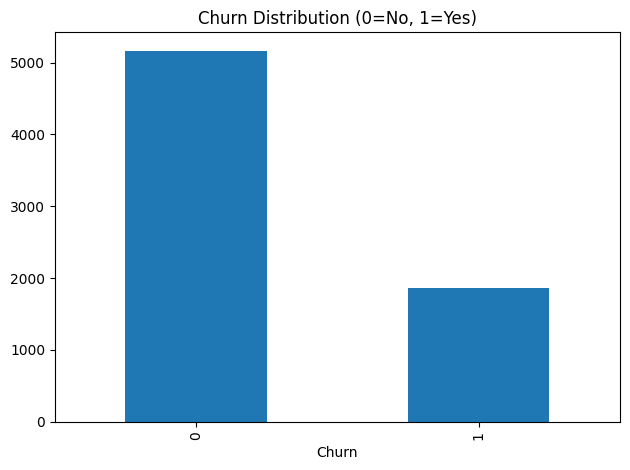

In [6]:
# Churn distribution
plt.figure()
df["Churn"].value_counts().sort_index().plot(kind="bar")
plt.title("Churn Distribution (0=No, 1=Yes)")
plt.tight_layout()
plt.show()


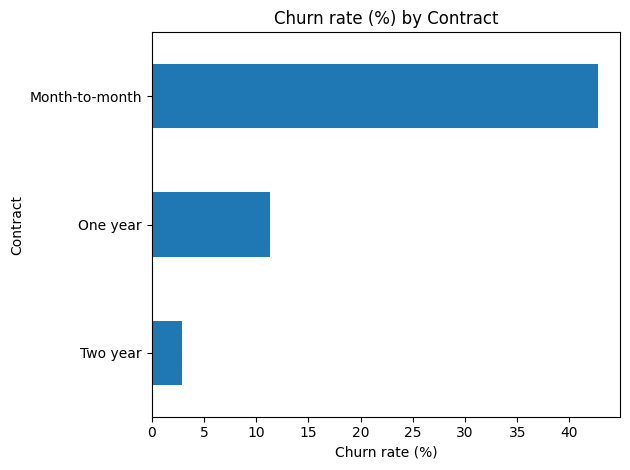

In [7]:
# Churn rate by Contract
cr = df.groupby("Contract")["Churn"].mean().mul(100).sort_values()
plt.figure()
cr.plot(kind="barh")
plt.title("Churn rate (%) by Contract")
plt.xlabel("Churn rate (%)")
plt.tight_layout()
plt.show()

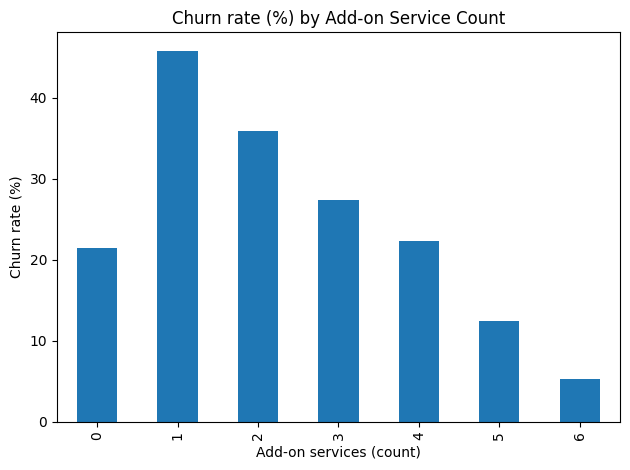

In [8]:
plt.figure()
df.groupby("addon_service_count")["Churn"].mean().mul(100).plot(kind="bar")
plt.title("Churn rate (%) by Add-on Service Count")
plt.xlabel("Add-on services (count)")
plt.ylabel("Churn rate (%)")
plt.tight_layout()
plt.show()

In [9]:
#  EDA tables
eda_contract = df.groupby("Contract").agg(customers=("Churn","size"), churn_rate=("Churn","mean")).reset_index()
eda_contract["churn_rate_pct"] = (eda_contract["churn_rate"]*100).round(2)
eda_contract.to_csv("outputs/churn_by_contract.csv", index=False)
print("Saved: outputs/churn_by_contract.csv")

Saved: outputs/churn_by_contract.csv
